In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/Jiwon/Desktop/2025_Airbnb_NYC_listings.csv', index_col=0)


In [5]:
df

,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,62165,Michael,2009-12-11,"New York, NY",I’m an urban planner working for an internatio...,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",157798,Irene,2010-07-04,"New York, NY",NaN,...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",165789,Sarah,2010-07-13,"New York, NY",I am a lawyer and work as an executive at an a...,...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,38833,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,166532,Matthew,2010-07-14,"New York, NY",I have been a New Yorker for a long time\n and...,...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,39282,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,168525,Gustavo,2010-07-16,"New York, NY",I am a music producer. And my wife is a hair s...,...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37429,1366333532374850165,city scrape,Beautiful 1-Bed Apt in Harlem!,Welcome to your temporary home in the vibrant ...,NaN,40019013,Cecilia,2015-07-30,"New York, NY",NaN,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
37430,1366717321390111215,city scrape,Private Room w/ Ensuite Bath H,Stylish Private Rooms w/ En-Suite Baths in Bro...,NaN,483056418,Kristina,2022-10-10,"New York, NY",Are you tired of the tedious and time-consumin...,...,NaN,NaN,NaN,NaN,f,24,0,24,0,NaN
37431,1366721904709517353,city scrape,2 Bedroom on East Side,Located in the Murray Hill area and occupies a...,NaN,30283594,Global Luxury Suites,2015-03-30,"Hawthorne, NJ",NaN,...,NaN,NaN,NaN,NaN,f,48,48,0,0,NaN
37432,1366722692755341871,city scrape,Stylish 2Bd near Bryant Park,Enjoy everything the city has to offer while l...,NaN,407304997,Boomerang,2021-06-15,"New York, NY","At Boomerang, we believe in the idea ""you get ...",...,NaN,NaN,NaN,NaN,t,25,25,0,0,NaN


In [6]:
# id 고유한지 확인

df['id'].nunique()

22308

In [17]:
# 전체적인 데이터 탐색


df.info()
df.describe()
df.isnull().sum()
df.isnull().mean().round(2)


<class 'pandas.core.frame.DataFrame'>
Index: 22308 entries, 0 to 37433
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22308 non-null  int64  
 1   source                                        22308 non-null  object 
 2   name                                          22308 non-null  object 
 3   description                                   21903 non-null  object 
 4   neighborhood_overview                         12262 non-null  object 
 5   host_id                                       22308 non-null  int64  
 6   host_name                                     22288 non-null  object 
 7   host_since                                    22288 non-null  object 
 8   host_location                                 17025 non-null  object 
 9   host_about                                    13391 non-null  obje

id                                              0.00
source                                          0.00
name                                            0.00
description                                     0.02
neighborhood_overview                           0.45
                                                ... 
calculated_host_listings_count_entire_homes     0.00
calculated_host_listings_count_private_rooms    0.00
calculated_host_listings_count_shared_rooms     0.00
reviews_per_month                               0.30
price_num                                       0.00
Length: 73, dtype: float64

## 데이터 쪼개기

In [8]:
host_cols = ['host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_identity_verified']
location_cols = ['host_id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude']
room_cols = ['host_id', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities']
price_cols = ['host_id', 'price', 'minimum_nights', 'maximum_nights', 'availability_60', 'availability_365', 'instant_bookable']
review_cols = ['host_id', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'first_review', 'last_review']


In [9]:
host_info = df[host_cols]
loc_info = df[location_cols]
room_info = df[room_cols]
price_info = df[price_cols]
reviews = df[review_cols]

In [10]:
host_info.head()

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified
0,62165,Michael,2009-12-11,"New York, NY",NaN,NaN,NaN,f,1.0,t
1,157798,Irene,2010-07-04,"New York, NY",NaN,NaN,100%,f,1.0,t
2,165789,Sarah,2010-07-13,"New York, NY",within a few hours,100%,40%,f,1.0,t
3,166532,Matthew,2010-07-14,"New York, NY",within an hour,100%,97%,t,1.0,t
4,168525,Gustavo,2010-07-16,"New York, NY",within an hour,100%,100%,t,2.0,t


In [11]:
loc_info.head()

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude
0,62165,Prospect Heights,Brooklyn,40.673760,-73.966110
1,157798,East Harlem,Manhattan,40.792454,-73.940742
2,165789,Boerum Hill,Brooklyn,40.684420,-73.980680
3,166532,Harlem,Manhattan,40.818058,-73.946671
4,168525,Williamsburg,Brooklyn,40.710651,-73.950874


In [12]:
room_info.head()

,host_id,property_type,room_type,accommodates,bedrooms,beds,bathrooms,amenities
0,62165,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif..."
1,157798,Private room in condo,Private room,2,1.0,1.0,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",..."
2,165789,Private room in home,Private room,2,5.0,5.0,2.5,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir..."
3,166532,Entire home,Entire home/apt,2,1.0,1.0,1.0,"[""Fire extinguisher"", ""Clothing storage: close..."
4,168525,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L..."


In [13]:
price_info.head()

,host_id,price,minimum_nights,maximum_nights,availability_60,availability_365,instant_bookable
0,62165,$200.00,90,365,57,362,f
1,157798,$82.00,30,999,0,204,f
2,165789,$765.00,3,60,49,326,f
3,166532,$139.00,2,45,18,25,f
4,168525,$130.00,4,45,22,38,f


In [14]:
reviews.head()

# review 데이터 결측치 어떻게 처리할지?

,host_id,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,first_review,last_review
0,62165,9,0.05,4.88,5.00,4.80,5.00,5.00,5.00,5.00,2010-12-11,2013-05-10
1,157798,102,0.58,4.77,4.82,4.76,4.88,4.90,4.38,4.71,2010-10-04,2023-12-09
2,165789,43,0.28,4.70,4.83,4.52,4.88,4.88,4.86,4.62,2012-07-09,2023-08-30
3,166532,241,1.36,4.85,4.87,4.50,4.96,4.96,4.79,4.82,2010-08-28,2025-02-21
4,168525,274,1.54,4.82,4.83,4.61,4.94,4.88,4.85,4.78,2010-08-02,2025-01-03


## 데이터 둘러보기

In [15]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


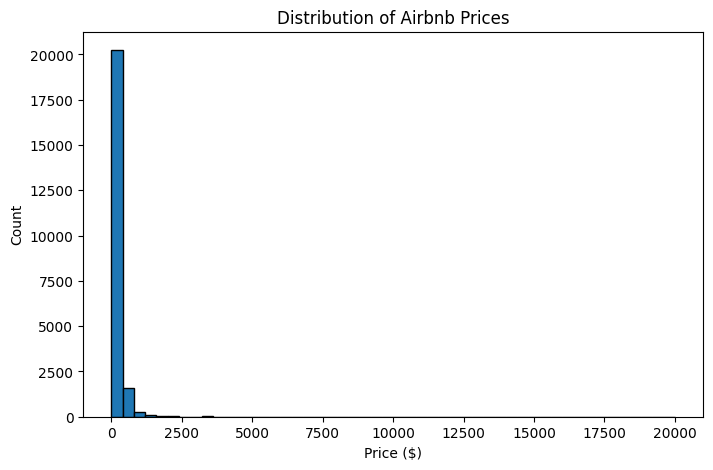

In [18]:
import matplotlib.pyplot as plt

# 가격에서 '$' 문자와 ','를 제거하고 float으로 변환
df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(8, 5))
plt.hist(df['price_num'], bins=50, edgecolor='k')
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


In [19]:
print(df['price_num'].describe())


count    22308.000000
mean       213.835216
std        427.599435
min          7.000000
25%         85.000000
50%        140.000000
75%        240.000000
max      20000.000000
Name: price_num, dtype: float64


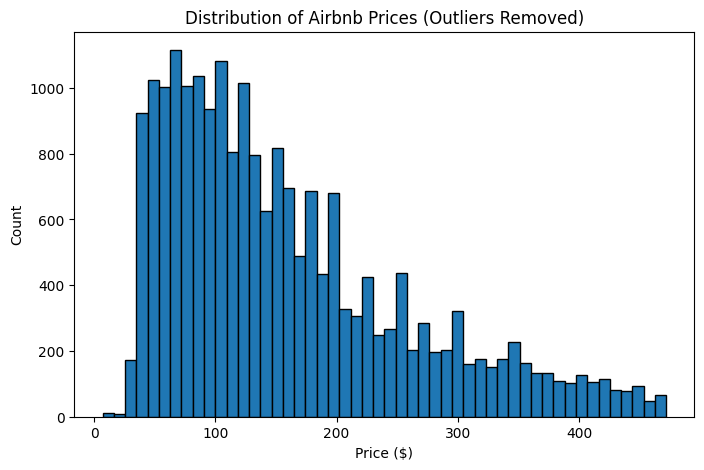

In [20]:
# iqr로 이상치

q1 = df['price_num'].quantile(0.25)
q3 = df['price_num'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 제거
filtered = df[(df['price_num'] >= lower_bound) & (df['price_num'] <= upper_bound)]

# 가격 분포 히스토그램 그리기
plt.figure(figsize=(8,5))
plt.hist(filtered['price_num'], bins=50, edgecolor='k')
plt.title('Distribution of Airbnb Prices (Outliers Removed)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

In [21]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


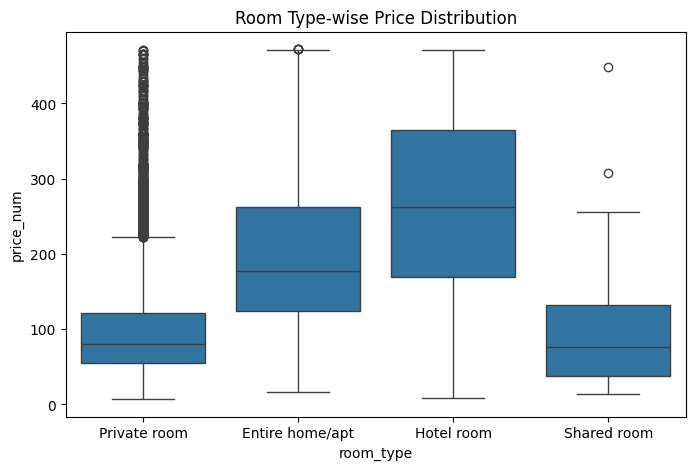

In [22]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price_num', data=filtered)
plt.title('Room Type-wise Price Distribution')
plt.show()


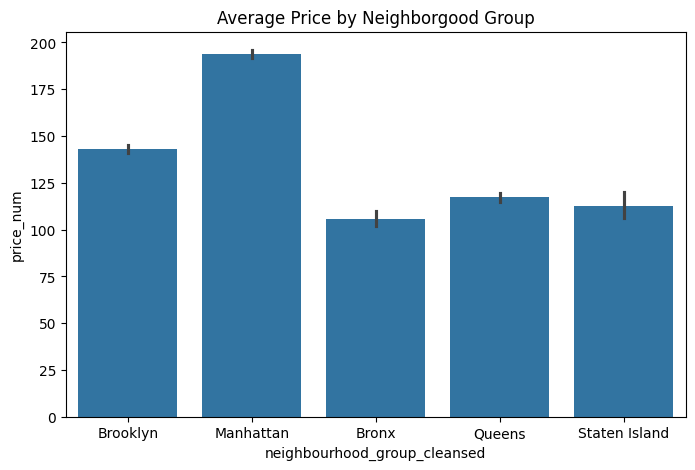

In [23]:
# 동네 그룹별 가격 평균 바

plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group_cleansed', y='price_num', data = filtered)
plt.title('Average Price by Neighborgood Group')
plt.show()

In [24]:
filtered.corr(numeric_only=True)['price_num'].sort_values(ascending=False)

price_num                                       1.000000
host_listings_count                             0.469232
host_total_listings_count                       0.464577
calculated_host_listings_count_entire_homes     0.451116
accommodates                                    0.421128
calculated_host_listings_count                  0.401981
beds                                            0.313958
maximum_minimum_nights                          0.293997
estimated_revenue_l365d                         0.229841
bedrooms                                        0.228854
maximum_nights                                  0.148708
review_scores_location                          0.127783
bathrooms                                       0.100451
review_scores_cleanliness                       0.090362
id                                              0.065704
availability_365                                0.062533
review_scores_rating                            0.060720
review_scores_accuracy         